In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

In [2]:
# Heatmap
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Masks for clients
clients = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_clients = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_clients = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_clients = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

strong_ihb_clients = strong_clients & ihb_clients
strong_dep_clients = strong_clients & dep_clients

# Following directions from here: 
## https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [3]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)

In [4]:
# Fill with means
"""X = np.zeros((250, 21))
for i, row in enumerate(resid_map.values.copy()):
    idx = np.argwhere(np.isnan(row)).flatten()
    if len(idx) > 0 and len(idx) < 21:
        nanmean = np.nanmean(row)
        row[idx] = nanmean
    elif len(idx) == 21:
        row = np.zeros(21)
    X[i, :] = row"""

'X = np.zeros((250, 21))\nfor i, row in enumerate(resid_map.values.copy()):\n    idx = np.argwhere(np.isnan(row)).flatten()\n    if len(idx) > 0 and len(idx) < 21:\n        nanmean = np.nanmean(row)\n        row[idx] = nanmean\n    elif len(idx) == 21:\n        row = np.zeros(21)\n    X[i, :] = row'

In [139]:
np.nansum(clients, axis=1)

array([ 2,  3,  0,  8, 10,  6,  6,  3,  2,  0,  2,  0,  0,  5,  1, 13, 11,
        6,  4, 11, 10, 12,  6,  6, 11,  3,  1,  5,  0,  4,  5,  0,  4,  0,
        6,  0,  3,  1,  3,  0,  0,  0,  0,  0,  1,  3,  2,  1,  0,  2,  0,
        2,  0, 12,  3,  6,  5,  5,  1,  5,  3,  6,  1,  1,  8,  9,  1,  3,
        3,  0,  1,  1,  0,  1,  2,  3,  2,  1,  1,  5,  2,  2,  4,  3,  2,
        4,  2,  4,  1,  0,  2,  4,  0,  1,  3,  2,  2,  2,  6,  2,  3,  4,
        5,  2,  6,  6,  0,  5,  4,  3,  3,  7,  2,  0,  7,  2,  1,  0,  0,
        2,  0,  2,  1,  2,  1,  1,  0,  4,  7,  3,  1,  5,  6,  2,  7,  0,
        1,  2,  0,  0,  0,  3,  0,  9,  1,  2,  0,  0,  2,  0,  2,  0,  3,
        0,  1,  2,  4,  0,  1,  2,  0,  0,  0,  4, 10,  2,  0,  2,  1,  0,
        6,  3,  1,  7, 11,  2,  2,  1,  2,  0,  2,  0,  0,  3,  2,  2,  7,
        0,  1,  3,  0,  0,  1,  1,  3,  1,  0,  1,  1,  1,  2,  0,  4,  1,
        0,  0,  2,  3,  0,  2,  0,  1,  0,  0,  1,  0,  1,  0,  1,  1,  0,
        2,  4,  0,  2,  5

In [211]:
pos = np.where(np.nansum(clients, axis=1) >= 10)
pos

(array([  4,  15,  16,  19,  20,  21,  24,  53, 164, 174, 242]),)

In [212]:
resid_map.values[pos].shape

(11, 21)

In [213]:
# generate the linkage matrix
#X= resid_map.fillna(0.0)
X= resid_map.fillna(0.0).values[pos]
#Z = linkage(X, 'ward')
Z = linkage(X, 'ward')

In [214]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.7518191890527369

In [215]:
Z[:20]

array([[ 4.     ,  5.     ,  1.87963,  2.     ],
       [ 7.     ,  8.     ,  1.98195,  2.     ],
       [ 9.     , 12.     ,  2.28694,  3.     ],
       [ 3.     , 11.     ,  2.81521,  3.     ],
       [ 2.     , 14.     ,  2.99865,  4.     ],
       [10.     , 13.     ,  3.00945,  4.     ],
       [ 1.     , 15.     ,  3.92131,  5.     ],
       [ 0.     ,  6.     ,  4.14249,  2.     ],
       [17.     , 18.     ,  4.70554,  7.     ],
       [16.     , 19.     ,  9.00109, 11.     ]])

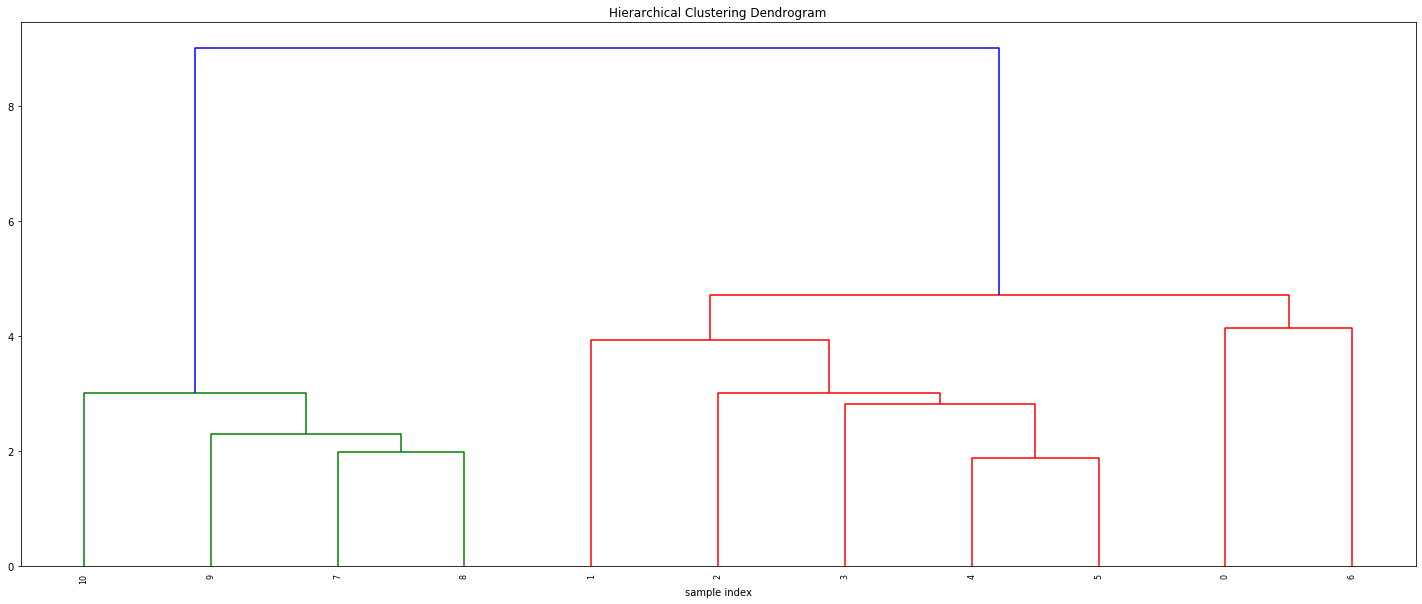

In [216]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [217]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

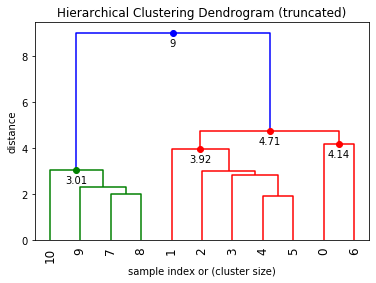

In [218]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=34,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
)
plt.show()

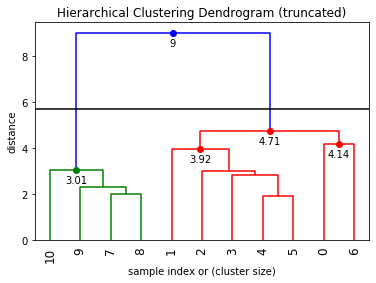

In [219]:
# set cut-off to 50
max_d = 5.7  # max_d as in max_distance
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [220]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters
#clusters = fcluster(Z, 30, criterion='maxclust')
#clusters


array([2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1], dtype=int32)

In [221]:
inv_pos_idx_dict = inv_map = {v: k for k, v in src_utils.__pos_idx_dict__.items()}

In [222]:
clust_dict = {}
for cluster in np.arange(1, max(clusters) + 1):
    clust_dict[cluster] = np.argwhere(clusters == cluster).flatten()

# Look at individual cluster heatmaps

In [223]:
def gen_clust_mask(cluster_arr, cluster, heatmap):
    mask = np.expand_dims(cluster_arr == cluster, axis=1)
    mask = np.repeat(mask, repeats=heatmap.values.shape[1], axis=1)
    return(mask)

In [224]:
clust_masks = {}
for cluster in clust_dict.keys():
    clust_masks[cluster] = gen_clust_mask(clusters, cluster, resid_map)

323+434+444+512


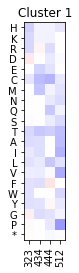

274+285+286+289+290+291+294


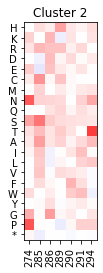

In [225]:
for cluster in clust_dict.keys():
    clust = clust_dict[cluster]
    clust = [inv_pos_idx_dict[pos[0][x]] for x in clust]
    mask = clust_masks[cluster]
    #heatmap = X.values[mask].reshape(-1, 21).T
    heatmap = X[mask].reshape(-1, 21).T
    fig, ax = plt.subplots()
    plt.imshow(heatmap, cmap='bwr', vmin=-4, vmax=4)
    # Set tick locations
    ax.set_yticks(np.arange(heatmap.shape[0]))
    ax.set_xticks(np.arange(heatmap.shape[1]))

    # Set tick labels
    ax.set_yticklabels(src_utils.__aa_idx_dict__.keys())
    ax.set_xticklabels([str(x) for x in clust])
    print('+'.join([str(x) for x in clust]))
    plt.xticks(rotation='vertical')
    plt.title('Cluster {}'.format(cluster))
    plt.show()

In [172]:
print('run fowler/src/PyMOL/scripts/loadBfacts.py')
print('run fowler/src/PyMOL/scripts/alphaToAll.py')
print('cd fowler/src/PyMOL/')
print('loadBfacts 2src_kinDom, startaa = 270, source = max_client_scores.txt')
print('cmd.cartoon(\"automatic\")')
print('alphaToAll *, b')
print('spectrum b, palette=blue_white_red, minimum={:.2f}, maximum={:.2f}'.format(np.nanmin(client_scores), np.nanmax(client_scores)))
print('@./scripts/src_1.pml')
#print('ray 800,1000')

run fowler/src/PyMOL/scripts/loadBfacts.py
run fowler/src/PyMOL/scripts/alphaToAll.py
cd fowler/src/PyMOL/
loadBfacts 2src_kinDom, startaa = 270, source = max_client_scores.txt
cmd.cartoon("automatic")
alphaToAll *, b
spectrum b, palette=blue_white_red, minimum=-0.66, maximum=0.80
@./scripts/src_1.pml
ray 800,1000


In [35]:
cluster = 1
clust = clust_dict[cluster]
mask = clust_masks[cluster]
heatmap = X.values[mask].reshape(-1, 21).T
np.nanmean(heatmap, axis=0)

array([ 0.09   ,  0.05015,  0.     ,  0.10733, -0.01345,  0.05194,
       -0.01119, -0.01492,  0.02667, -0.17778,  0.16912,  0.10385,
       -0.02588,  0.02487,  0.00911, -0.11436,  0.00227, -0.01492,
       -0.00172, -0.01846,  0.06763, -0.00281, -0.00376,  0.02094,
        0.03104, -0.07138,  0.05346, -0.01651, -0.07577,  0.16149,
       -0.01057, -0.05218, -0.06301,  0.04858, -0.02072, -0.00072,
       -0.25184,  0.06847, -0.13829,  0.08943, -0.00208,  0.08142,
        0.00113, -0.01448,  0.08251, -0.04012,  0.09002,  0.01168,
        0.06934,  0.02633, -0.04277, -0.00522, -0.02984, -0.02607,
       -0.07516,  0.05751,  0.02483, -0.04646, -0.17566, -0.02658,
       -0.10866, -0.15643, -0.08737, -0.1103 , -0.04665, -0.06166,
       -0.0769 , -0.00705, -0.00758,  0.01376, -0.1412 , -0.03781,
       -0.03517, -0.07332, -0.02971, -0.08809, -0.02909, -0.14251,
       -0.11128, -0.07249, -0.02582, -0.08513, -0.14106,  0.04105,
       -0.21077, -0.0919 ,  0.01862, -0.00112, -0.05487, -0.00

In [591]:
np.count_

array([10, 14, 17, 18, 12, 15, 17,  8])

In [563]:
sh3_interface=[
270, 271, 289, 290, 292,
293, 295, 311, 314, 315,
327, 328, 329, 330, 331,
332, 333, 334, 336, 338,
340, 342, 403
]

sh2_interface=[
323, 324, 368, 371, 372,
400, 402, 519, 520
]

alphaF_pocket=[
378, 381, 443, 444, 506,
508, 511, 512
]

active_site=[
281, 280, 278, 298, 284,
296, 276, 341, 342, 326,
344, 396, 343, 345, 351,
394, 391, 389, 407
]

src_hsp90_homology_interface=[
337, 338, 339, 340, 341,
342, 343, 345, 346, 347,
351, 352, 355, 371, 375,
382, 398, 399, 400, 402,
404, 412, 415, 417, 418,
513, 515, 516,
]

src_cdc37_homology_interface=[
372, 375, 376, 379, 380,
383, 384, 385, 386, 396,
402, 403, 404, 405, 406,
407, 408, 411, 412, 413,
]

interface_dict = {
    'sh3' : sh3_interface,
    'sh2' : sh2_interface,
    'af' : alphaF_pocket,
    'as' : active_site,
    'hsp90': src_hsp90_homology_interface,
    'cdc37': src_cdc37_homology_interface
}

In [580]:
# Identify which interfaces are present in these clusters
clust_int = {}
for pos in clust_dict[7]:
    pos = inv_pos_idx_dict[pos]
    interfaces = []
    for intfc in interface_dict.keys():
        if pos in interface_dict[intfc]:
            interfaces.append(intfc)
    clust_int[pos] = interfaces

In [585]:
'+'.join([str(inv_pos_idx_dict[x]) for x in clust_dict[1]])

'273+276+286+289+290+291+300+304+413'

In [567]:
clust_dict

{1: array([  3,   6,  16,  19,  20,  21,  30,  34, 143]),
 2: array([15, 24]),
 3: array([4]),
 4: array([ 17,  29,  42,  44,  45,  49,  71,  75,  78,  79,  81,  82,  83,
         84,  87,  91,  93,  94, 100, 101, 103, 104, 105, 108, 112, 122,
        128, 129, 130, 132, 134, 145, 148, 163, 170, 171, 173, 175, 176,
        177, 178, 184, 188, 192, 195, 209, 218, 221, 222, 224, 225, 228,
        230, 231, 232, 233, 236, 238, 240, 243, 248]),
 5: array([ 53,  55, 107, 127, 164, 174, 234, 237, 241, 242]),
 6: array([ 13,  27,  56,  59,  61,  65, 186, 189]),
 7: array([  5, 102, 111]),
 8: array([  0,   1,   2,   7,   8,   9,  10,  11,  12,  14,  18,  22,  23,
         25,  26,  28,  31,  32,  33,  35,  36,  37,  38,  39,  40,  41,
         43,  46,  47,  48,  50,  51,  52,  54,  57,  58,  60,  62,  63,
         64,  66,  67,  68,  69,  70,  72,  73,  74,  76,  77,  80,  85,
         86,  88,  89,  90,  92,  95,  96,  97,  98,  99, 106, 109, 110,
        113, 114, 115, 116, 117, 118, 119, 